In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# warning 없애기
import warnings
warnings.filterwarnings(action='ignore')
import platform
if platform.system() == 'Windows': # Windows
    plt.rc('font', family='Malgun Gothic')

### Data 준비

In [10]:
data = pd.read_csv('광고집행 채널별.csv', encoding = 'cp949')

### Data 확인

In [11]:
data

,채널,업종,광고주,상품,연월,매체,항목,계
0,KBS-2TV,성인종합영양제,일동제약,아로나민골드,19.01,지상파,금액,11100
1,KBS-2TV,성인종합영양제,일동제약,아로나민골드,19.01,지상파,횟수,1
2,KBS-2TV,성인종합영양제,일동제약,아로나민골드,19.01,지상파,노출량,15
3,KBS-2TV,성인종합영양제,일동제약,아로나민골드,19.02,지상파,금액,341250
4,KBS-2TV,성인종합영양제,일동제약,아로나민골드,19.02,지상파,횟수,49
...,...,...,...,...,...,...,...,...
11853,MBN,성인종합영양제,GC녹십자,GC녹십자비맥스메타정,22.02,종편[NB],횟수,70
11854,MBN,성인종합영양제,GC녹십자,GC녹십자비맥스메타정,22.02,종편[NB],노출량,1410
11855,MBN,성인종합영양제,GC녹십자,GC녹십자비맥스메타정,22.03,종편[NB],금액,65135
11856,MBN,성인종합영양제,GC녹십자,GC녹십자비맥스메타정,22.03,종편[NB],횟수,115


### Data info 확인

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11858 entries, 0 to 11857
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   채널      11858 non-null  object 
 1   업종      11858 non-null  object 
 2   광고주     11858 non-null  object 
 3   상품      11858 non-null  object 
 4   연월      11858 non-null  float64
 5   매체      11858 non-null  object 
 6   항목      11858 non-null  object 
 7   계       11858 non-null  int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 741.2+ KB


### 결측치 확인

In [13]:
data.isnull().sum() 

채널     0
업종     0
광고주    0
상품     0
연월     0
매체     0
항목     0
계      0
dtype: int64

### 칼럼 EDA

#### 채널 분류

In [14]:
data['채널'].unique()

array(['KBS-2TV', 'KBS-2TV(부산)', 'KBS-2TV(대구)', 'KBS-2TV(대전)',
       'KBS-2TV(전주)', 'KBS-2TV(광주)', 'KBS-2TV(마산)', 'KBS-2TV(울산)',
       'KBS-2TV(제주)', 'MBC-TV', 'MBC-TV(부산)', 'MBC-TV(대구)', 'MBC-TV(대전)',
       'MBC-TV(전주)', 'MBC-TV(광주)', 'MBC-TV(마산)', 'MBC-TV(울산)',
       'MBC-TV(청주)', 'MBC-TV(춘천)', 'MBC-TV(제주)', 'SBS-TV', 'KNN-TV(부산)',
       'TBC-TV(대구)', 'TJB-TV(대전)', 'JTV-TV(전주)', 'KBC-TV(광주)',
       'UBC-TV(울산)', 'CJB-TV(청주)', 'G1-TV(강원)', 'JIBS-TV', 'EBS-TV',
       'OBS', 'CBS-FM', 'SBS-RD', 'MBC-FM', 'CBS-RD', 'SBS-FM', 'YTN-FM',
       'GOMTV', '네이버', '다음', 'YouTube', 'SMR', 'Tving', 'Afreecatv',
       '인스타그램', 'OCN', 'OCNThrills', 'OGN', 'Tooniverse', 'SBSMTV',
       'Olive', 'OCNMovies', 'Mnet', 'YTN', 'MBC드라마넷', 'KBS드라마',
       'SBSPlus', 'KBSN스포츠', 'MBCSPORTS+', 'SBSGolf', 'SBSSports', 'iHQ',
       'MBCevery1', 'E채널', 'Champ', 'tvNSHOW', 'OnStyle', '채널나우', 'CNTV',
       'tvN', 'KSTAR', 'tvNDRAMA', 'TVCHOSUN2', 'iHQdrama', 'KBSJOY',
       'KBSLIFE', 'JTBC2', 'JTBCGO

#### 업종 분류

In [15]:
data['업종'].unique()

array(['성인종합영양제'], dtype=object)

#### 광고주 분류 및 분포확인

In [16]:
data['광고주'].unique()

array(['일동제약', '한국화이자제약(주)', 'GC녹십자', '글락소스미스클라인컨슈머헬스케어코리아', '구주제약',
       '유유제약'], dtype=object)

In [17]:
data['광고주'].value_counts()

일동제약                   5474
글락소스미스클라인컨슈머헬스케어코리아    3224
GC녹십자                  2258
한국화이자제약(주)              758
구주제약                     93
유유제약                     51
Name: 광고주, dtype: int64

#### 상품 분류 및 분포확인

In [18]:
data['상품'].unique()

array(['아로나민골드', '아로나민씨플러스', '한국화이자센트룸포맨&포우먼', 'GC녹십자비맥스메타정',
       '글락소스미스클라인센트룸', '구주알코덱스', '비나폴로', '글락소스미스클라인센트룸멀티구미',
       '글락소스미스클라인센트룸실버포맨', '글락소스미스클라인센트룸포우먼', '글락소스미스클라인센트룸포맨',
       '한국화이자센트룸아쿠아비타', '한국화이자센트룸포우먼', 'GC녹십자비맥스액티브정', 'GC녹십자비맥스정'],
      dtype=object)

In [19]:
data['상품'].value_counts()

아로나민골드              3761
글락소스미스클라인센트룸        3173
GC녹십자비맥스메타정         2253
아로나민씨플러스            1713
한국화이자센트룸포맨&포우먼       736
구주알코덱스                93
비나폴로                  51
글락소스미스클라인센트룸포우먼       20
글락소스미스클라인센트룸멀티구미      15
글락소스미스클라인센트룸실버포맨      14
한국화이자센트룸아쿠아비타         12
한국화이자센트룸포우먼           10
GC녹십자비맥스액티브정           4
글락소스미스클라인센트룸포맨         2
GC녹십자비맥스정              1
Name: 상품, dtype: int64

#### 매체 분류 및 분포확인

In [20]:
data['매체'].unique()

array(['지상파', '라디오', '디지털동영상', '케이블[NB]', '디지털배너', '종편[NB]'], dtype=object)

In [21]:
data['매체'].value_counts()

케이블[NB]    6627
지상파        3300
종편[NB]     1062
디지털동영상      692
라디오         156
디지털배너        21
Name: 매체, dtype: int64

In [22]:
data1 = data[data['광고주']=='일동제약']
data2 = data[data['광고주']=='GC녹십자']
data3 = data[data['광고주']=='글락소스미스클라인컨슈머헬스케어코리아']

In [48]:
data3

,채널,업종,광고주,상품,연월,매체,항목,계
927,SBS-TV,성인종합영양제,글락소스미스클라인컨슈머헬스케어코리아,글락소스미스클라인센트룸,20.04,지상파,금액,411618
928,SBS-TV,성인종합영양제,글락소스미스클라인컨슈머헬스케어코리아,글락소스미스클라인센트룸,20.04,지상파,횟수,66
929,SBS-TV,성인종합영양제,글락소스미스클라인컨슈머헬스케어코리아,글락소스미스클라인센트룸,20.04,지상파,노출량,990
930,SBS-TV,성인종합영양제,글락소스미스클라인컨슈머헬스케어코리아,글락소스미스클라인센트룸,20.05,지상파,금액,507991
931,SBS-TV,성인종합영양제,글락소스미스클라인컨슈머헬스케어코리아,글락소스미스클라인센트룸,20.05,지상파,횟수,78
...,...,...,...,...,...,...,...,...
11631,MBN,성인종합영양제,글락소스미스클라인컨슈머헬스케어코리아,글락소스미스클라인센트룸,22.02,종편[NB],횟수,83
11632,MBN,성인종합영양제,글락소스미스클라인컨슈머헬스케어코리아,글락소스미스클라인센트룸,22.02,종편[NB],노출량,1245
11633,MBN,성인종합영양제,글락소스미스클라인컨슈머헬스케어코리아,글락소스미스클라인센트룸,22.03,종편[NB],금액,60154
11634,MBN,성인종합영양제,글락소스미스클라인컨슈머헬스케어코리아,글락소스미스클라인센트룸,22.03,종편[NB],횟수,65


In [23]:
data_c = pd.concat([data1, data2, data3], axis=0)

In [24]:
data_c.head(10)

,채널,업종,광고주,상품,연월,매체,항목,계
0,KBS-2TV,성인종합영양제,일동제약,아로나민골드,19.01,지상파,금액,11100
1,KBS-2TV,성인종합영양제,일동제약,아로나민골드,19.01,지상파,횟수,1
2,KBS-2TV,성인종합영양제,일동제약,아로나민골드,19.01,지상파,노출량,15
3,KBS-2TV,성인종합영양제,일동제약,아로나민골드,19.02,지상파,금액,341250
4,KBS-2TV,성인종합영양제,일동제약,아로나민골드,19.02,지상파,횟수,49
5,KBS-2TV,성인종합영양제,일동제약,아로나민골드,19.02,지상파,노출량,735
6,KBS-2TV,성인종합영양제,일동제약,아로나민골드,19.03,지상파,금액,568044
7,KBS-2TV,성인종합영양제,일동제약,아로나민골드,19.03,지상파,횟수,79
8,KBS-2TV,성인종합영양제,일동제약,아로나민골드,19.03,지상파,노출량,1185
9,KBS-2TV,성인종합영양제,일동제약,아로나민골드,19.04,지상파,금액,756900


In [52]:
data_c.groupby(['광고주','항목']).sum().drop(['연월'], axis = 1)

계
광고주                 항목           
GC녹십자               금액   29061247
                    노출량   1163760
                    횟수      63819
글락소스미스클라인컨슈머헬스케어코리아 금액   38739511
                    노출량   1642605
                    횟수     111252
일동제약                금액   75822527
                    노출량   2667816
                    횟수     173362

In [26]:
data1_money = data1[data1['항목']=='금액']
data2_money = data2[data2['항목']=='금액']
data3_money = data3[data3['항목']=='금액']

In [27]:
data1_count = data1[data1['항목']=='횟수']
data2_count = data2[data2['항목']=='횟수']
data3_count = data3[data3['항목']=='횟수']

In [28]:
data1_exposure = data1[data1['항목']=='노출량']
data2_exposure = data2[data2['항목']=='노출량']
data3_exposure = data3[data3['항목']=='노출량']

In [53]:
data_money_all = pd.concat([data1_money, data2_money, data3_money], axis=0)
data_money_all

,채널,업종,광고주,상품,연월,매체,항목,계
0,KBS-2TV,성인종합영양제,일동제약,아로나민골드,19.01,지상파,금액,11100
3,KBS-2TV,성인종합영양제,일동제약,아로나민골드,19.02,지상파,금액,341250
6,KBS-2TV,성인종합영양제,일동제약,아로나민골드,19.03,지상파,금액,568044
9,KBS-2TV,성인종합영양제,일동제약,아로나민골드,19.04,지상파,금액,756900
12,KBS-2TV,성인종합영양제,일동제약,아로나민골드,19.06,지상파,금액,429000
...,...,...,...,...,...,...,...,...
11621,MBN,성인종합영양제,글락소스미스클라인컨슈머헬스케어코리아,글락소스미스클라인센트룸,21.10,종편[NB],금액,96106
11624,MBN,성인종합영양제,글락소스미스클라인컨슈머헬스케어코리아,글락소스미스클라인센트룸,21.12,종편[NB],금액,103760
11627,MBN,성인종합영양제,글락소스미스클라인컨슈머헬스케어코리아,글락소스미스클라인센트룸,22.01,종편[NB],금액,104894
11630,MBN,성인종합영양제,글락소스미스클라인컨슈머헬스케어코리아,글락소스미스클라인센트룸,22.02,종편[NB],금액,68962


In [54]:
data_count_all = pd.concat([data1_count, data2_count, data3_count], axis=0)
data_count_all

,채널,업종,광고주,상품,연월,매체,항목,계
1,KBS-2TV,성인종합영양제,일동제약,아로나민골드,19.01,지상파,횟수,1
4,KBS-2TV,성인종합영양제,일동제약,아로나민골드,19.02,지상파,횟수,49
7,KBS-2TV,성인종합영양제,일동제약,아로나민골드,19.03,지상파,횟수,79
10,KBS-2TV,성인종합영양제,일동제약,아로나민골드,19.04,지상파,횟수,115
13,KBS-2TV,성인종합영양제,일동제약,아로나민골드,19.06,지상파,횟수,72
...,...,...,...,...,...,...,...,...
11622,MBN,성인종합영양제,글락소스미스클라인컨슈머헬스케어코리아,글락소스미스클라인센트룸,21.10,종편[NB],횟수,139
11625,MBN,성인종합영양제,글락소스미스클라인컨슈머헬스케어코리아,글락소스미스클라인센트룸,21.12,종편[NB],횟수,139
11628,MBN,성인종합영양제,글락소스미스클라인컨슈머헬스케어코리아,글락소스미스클라인센트룸,22.01,종편[NB],횟수,132
11631,MBN,성인종합영양제,글락소스미스클라인컨슈머헬스케어코리아,글락소스미스클라인센트룸,22.02,종편[NB],횟수,83


In [55]:
data_exposure_all = pd.concat([data1_exposure, data2_exposure, data3_exposure], axis = 0)
data_exposure_all

,채널,업종,광고주,상품,연월,매체,항목,계
2,KBS-2TV,성인종합영양제,일동제약,아로나민골드,19.01,지상파,노출량,15
5,KBS-2TV,성인종합영양제,일동제약,아로나민골드,19.02,지상파,노출량,735
8,KBS-2TV,성인종합영양제,일동제약,아로나민골드,19.03,지상파,노출량,1185
11,KBS-2TV,성인종합영양제,일동제약,아로나민골드,19.04,지상파,노출량,1725
14,KBS-2TV,성인종합영양제,일동제약,아로나민골드,19.06,지상파,노출량,1080
...,...,...,...,...,...,...,...,...
11623,MBN,성인종합영양제,글락소스미스클라인컨슈머헬스케어코리아,글락소스미스클라인센트룸,21.10,종편[NB],노출량,2085
11626,MBN,성인종합영양제,글락소스미스클라인컨슈머헬스케어코리아,글락소스미스클라인센트룸,21.12,종편[NB],노출량,2085
11629,MBN,성인종합영양제,글락소스미스클라인컨슈머헬스케어코리아,글락소스미스클라인센트룸,22.01,종편[NB],노출량,1980
11632,MBN,성인종합영양제,글락소스미스클라인컨슈머헬스케어코리아,글락소스미스클라인센트룸,22.02,종편[NB],노출량,1245


## <금액> 광고주/월별 집계  - 상품별 집계 고민해보기

In [77]:
data_money_all.groupby(['광고주','연월']).sum()

계
광고주   연월            
GC녹십자 19.01    34303
      20.01   821440
      20.02  1791369
      20.03  1486035
      20.05   186349
...              ...
일동제약  21.08  1500998
      21.09  4743477
      21.10   611466
      22.02  2520486
      22.03  1496031

[87 rows x 1 columns]

In [69]:
data_count_all = pd.concat([data1_count, data2_count, data3_count], axis=0)
data_count_all

,채널,업종,광고주,상품,연월,매체,항목,계
1,KBS-2TV,성인종합영양제,일동제약,아로나민골드,19.01,지상파,횟수,1
4,KBS-2TV,성인종합영양제,일동제약,아로나민골드,19.02,지상파,횟수,49
7,KBS-2TV,성인종합영양제,일동제약,아로나민골드,19.03,지상파,횟수,79
10,KBS-2TV,성인종합영양제,일동제약,아로나민골드,19.04,지상파,횟수,115
13,KBS-2TV,성인종합영양제,일동제약,아로나민골드,19.06,지상파,횟수,72
...,...,...,...,...,...,...,...,...
11622,MBN,성인종합영양제,글락소스미스클라인컨슈머헬스케어코리아,글락소스미스클라인센트룸,21.10,종편[NB],횟수,139
11625,MBN,성인종합영양제,글락소스미스클라인컨슈머헬스케어코리아,글락소스미스클라인센트룸,21.12,종편[NB],횟수,139
11628,MBN,성인종합영양제,글락소스미스클라인컨슈머헬스케어코리아,글락소스미스클라인센트룸,22.01,종편[NB],횟수,132
11631,MBN,성인종합영양제,글락소스미스클라인컨슈머헬스케어코리아,글락소스미스클라인센트룸,22.02,종편[NB],횟수,83


## <횟수> 광고주/월별 집계

In [32]:
data_count_all.groupby(['광고주','연월']).sum()

계
광고주   연월         
GC녹십자 19.01    47
      20.01   797
      20.02  3092
      20.03  1355
      20.05   253
...           ...
일동제약  21.08  3492
      21.09  9350
      21.10  2161
      22.02  4803
      22.03  4203

[87 rows x 1 columns]

In [33]:
data_exposure_all = pd.concat([data1_exposure, data2_exposure, data3_exposure], axis=0)
data_exposure_all

,채널,업종,광고주,상품,연월,매체,항목,계
2,KBS-2TV,성인종합영양제,일동제약,아로나민골드,19.01,지상파,노출량,15
5,KBS-2TV,성인종합영양제,일동제약,아로나민골드,19.02,지상파,노출량,735
8,KBS-2TV,성인종합영양제,일동제약,아로나민골드,19.03,지상파,노출량,1185
11,KBS-2TV,성인종합영양제,일동제약,아로나민골드,19.04,지상파,노출량,1725
14,KBS-2TV,성인종합영양제,일동제약,아로나민골드,19.06,지상파,노출량,1080
...,...,...,...,...,...,...,...,...
11623,MBN,성인종합영양제,글락소스미스클라인컨슈머헬스케어코리아,글락소스미스클라인센트룸,21.10,종편[NB],노출량,2085
11626,MBN,성인종합영양제,글락소스미스클라인컨슈머헬스케어코리아,글락소스미스클라인센트룸,21.12,종편[NB],노출량,2085
11629,MBN,성인종합영양제,글락소스미스클라인컨슈머헬스케어코리아,글락소스미스클라인센트룸,22.01,종편[NB],노출량,1980
11632,MBN,성인종합영양제,글락소스미스클라인컨슈머헬스케어코리아,글락소스미스클라인센트룸,22.02,종편[NB],노출량,1245


## <노출량> 광고주/월별 집계

In [79]:
data_exposure_all.groupby(['광고주','연월']).sum()

계
광고주   연월           
GC녹십자 20.01   15870
      20.02   58005
      20.03   22435
      20.05    2880
      20.06   29610
...             ...
일동제약  21.08   49605
      21.09  137295
      21.10   31200
      22.02   83805
      22.03   63045

[84 rows x 1 columns]

<AxesSubplot:xlabel='광고주', ylabel='count'>

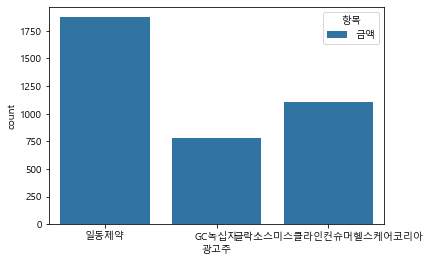

In [74]:
sns.countplot(x="광고주", hue="항목", data=data_money_all)

<AxesSubplot:xlabel='광고주', ylabel='count'>

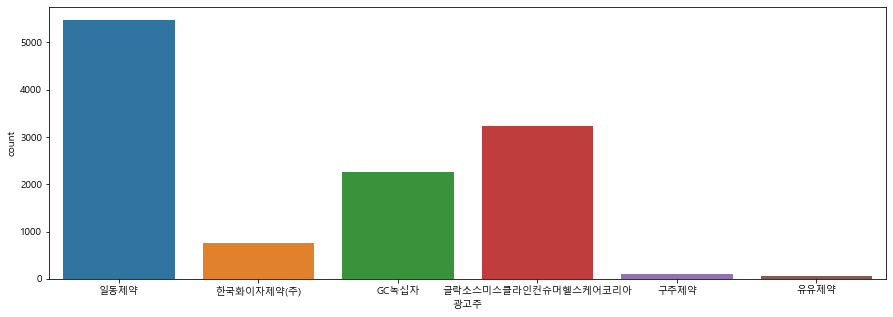

In [36]:
plt.figure(figsize=(15,5))
sns.countplot(data['광고주'])  #이건 걍 데이터 개수 세주는 것에 불과함.